<a href="https://colab.research.google.com/github/TomographicImaging/gVXR-Tutorials/blob/main/notebooks/polychromatism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
#
#  Copyright 2025 United Kingdom Research and Innovation
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
#
#   Authored by:    Franck Vidal (UKRI-STFC)

![gVXR](https://github.com/TomographicImaging/gVXR-Tutorials/blob/main/img/Logo-transparent-small.png?raw=1)

# X-ray tube spectra

In this notebook we explore how to specify polychromtic X-ray tube spectra, without and with filtration.
We also shows how to plot the spectrum.

<!-- 

<div class="alert alert-block alert-warning">
    <b>Note:</b> Make sure the Python packages are already installed. See <a href="../README.md">README.md</a> in the root directory of the repository. If you are running this notebook from Google Colab, please run the cell below to install the required packages.
</div> -->

## Aim and objectives of this session

<!-- The aim of this session is to replicate an actual scan.

To achieve this, the main objectives are to:-->

1. Select either the Speckpy or Xpekgen backends.
2. Specify the tube voltage, the beam filtration if any, the number of energy bins, and exposure.
3. Retrieve the beam spectrum and plot it.
4. Visualise the effect of beam filtration on a phantom.

<!-- ![Screenshot of the 3D environment using K3D](https://github.com/TomographicImaging/gVXR-Tutorials/blob/main/notebooks/output_data/multi_material-CT_scan/k3d_screenshot-cropped.png?raw=1) -->

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !apt-get install libnvidia-gl-575
    !pip install gvxr

## Import packages

In [3]:
import os
import numpy as np

import matplotlib # To plot images
import matplotlib.pyplot as plt # Plotting
from matplotlib.colors import LogNorm # Look up table
from matplotlib.colors import PowerNorm # Look up table

font = {'family' : 'serif',
            'size'   : 30
        }
matplotlib.rc('font', **font)

# Uncomment the line below to use LaTeX fonts
# matplotlib.rc('text', usetex=True)

from gvxrPython3 import gvxr # Simulate X-ray images
from gvxrPython3.utils import loadSpectrumSpekpy, loadSpectrumXpecgen

Where to save the plots

In [4]:
output_path = "../notebooks/output_data/polychromatism"
if not os.path.exists(output_path):
    os.makedirs(output_path)

Create an OpenGL context

In [5]:
gvxr.createOpenGLContext()

Wed May 28 14:53:29 2025 ---- Create window (ID: -1)
Wed May 28 14:53:29 2025 ---- Request an interactive OpenGL context
Wed May 28 14:53:29 2025 ---- Initialise GLFW
Wed May 28 14:53:29 2025 ---- Create an OpenGL window with a 4.3 context.
Wed May 28 14:53:29 2025 ---- Make the window's context current
Wed May 28 14:53:29 2025 ---- Initialise GLEW
Wed May 28 14:53:29 2025 ---- OpenGL vendor: NVIDIA Corporation
Wed May 28 14:53:29 2025 ---- OpenGL renderer: NVIDIA GeForce RTX 4060 Ti/PCIe/SSE2
Wed May 28 14:53:29 2025 ---- OpenGL version: 4.3.0 NVIDIA 560.28.03
Wed May 28 14:53:29 2025 ---- Use OpenGL 4.5.
Wed May 28 14:53:29 2025 ---- Use OpenGL Compute Shader.
Wed May 28 14:53:29 2025 ---- Initialise the X-ray renderer if needed and if possible


Set up the detector

In [6]:
gvxr.setDetectorPosition(10.0, 0.0, 0.0, "cm")
gvxr.setDetectorUpVector(0, 0, -1)
gvxr.setDetectorNumberOfPixels(640, 320)
gvxr.setDetectorPixelSize(0.5, 0.5, "mm")

Load the sample data

In [7]:
# Locate the sample STL file from the package directory
path = os.path.dirname(gvxr.__file__)
fname = path + "/welsh-dragon-small.stl"

# Make sure it exists
if not os.path.exists(fname):
    raise IOError(fname)

# Load the file
gvxr.loadMeshFile("Dragon", fname, "mm")

# Move its bounding box centre to (0, 0, 0)
gvxr.moveToCentre("Dragon");

# Material property: Brass
gvxr.setMixture("Dragon", ["Cu", "Zn"], [0.66, 0.44])
gvxr.setDensity("Dragon", 8.73, "g.cm-3")

Wed May 28 14:53:29 2025 ---- file_name:	/home/fpvidal/miniconda3/envs/DIAD2gVXR/lib/python3.11/site-packages/gvxrPython3/_gvxrPython3/welsh-dragon-small.stl	nb_faces:	457345	nb_vertices:	1372035	bounding_box (in cm):	(-4.47065, -74.9368, 23.5909)	(2.37482, -59.4256, 36.0343)


Create a source

In [8]:
gvxr.setSourcePosition(-40.0,  0.0, 0.0, "cm")
gvxr.usePointSource()
#  For a parallel source, use gvxr.useParallelBeam();

Set its spectrum

```python
loadSpectrumSpekpy(kvp_in_kV, filters=None, th_in_deg=12, max_number_of_energy_bins=None, mAs=None, z=None)
loadSpectrumXpecgen(kvp_in_kV, filters=None, th_in_deg=12, max_number_of_energy_bins=None)
```

In [9]:
kV = 120
filtration = None
max_number_of_energy_bins = 50

loadSpectrumXpecgen(kV, filters=filtration, th_in_deg=12, max_number_of_energy_bins=max_number_of_energy_bins);

energy_bins = gvxr.getEnergyBins("keV")
photon_count = np.array(gvxr.getPhotonCountEnergyBins(), dtype=np.single)
photon_count /= photon_count.sum()

Wed May 28 14:53:35 2025 ---- Initialise the renderer


Plot the corresponding spectrum

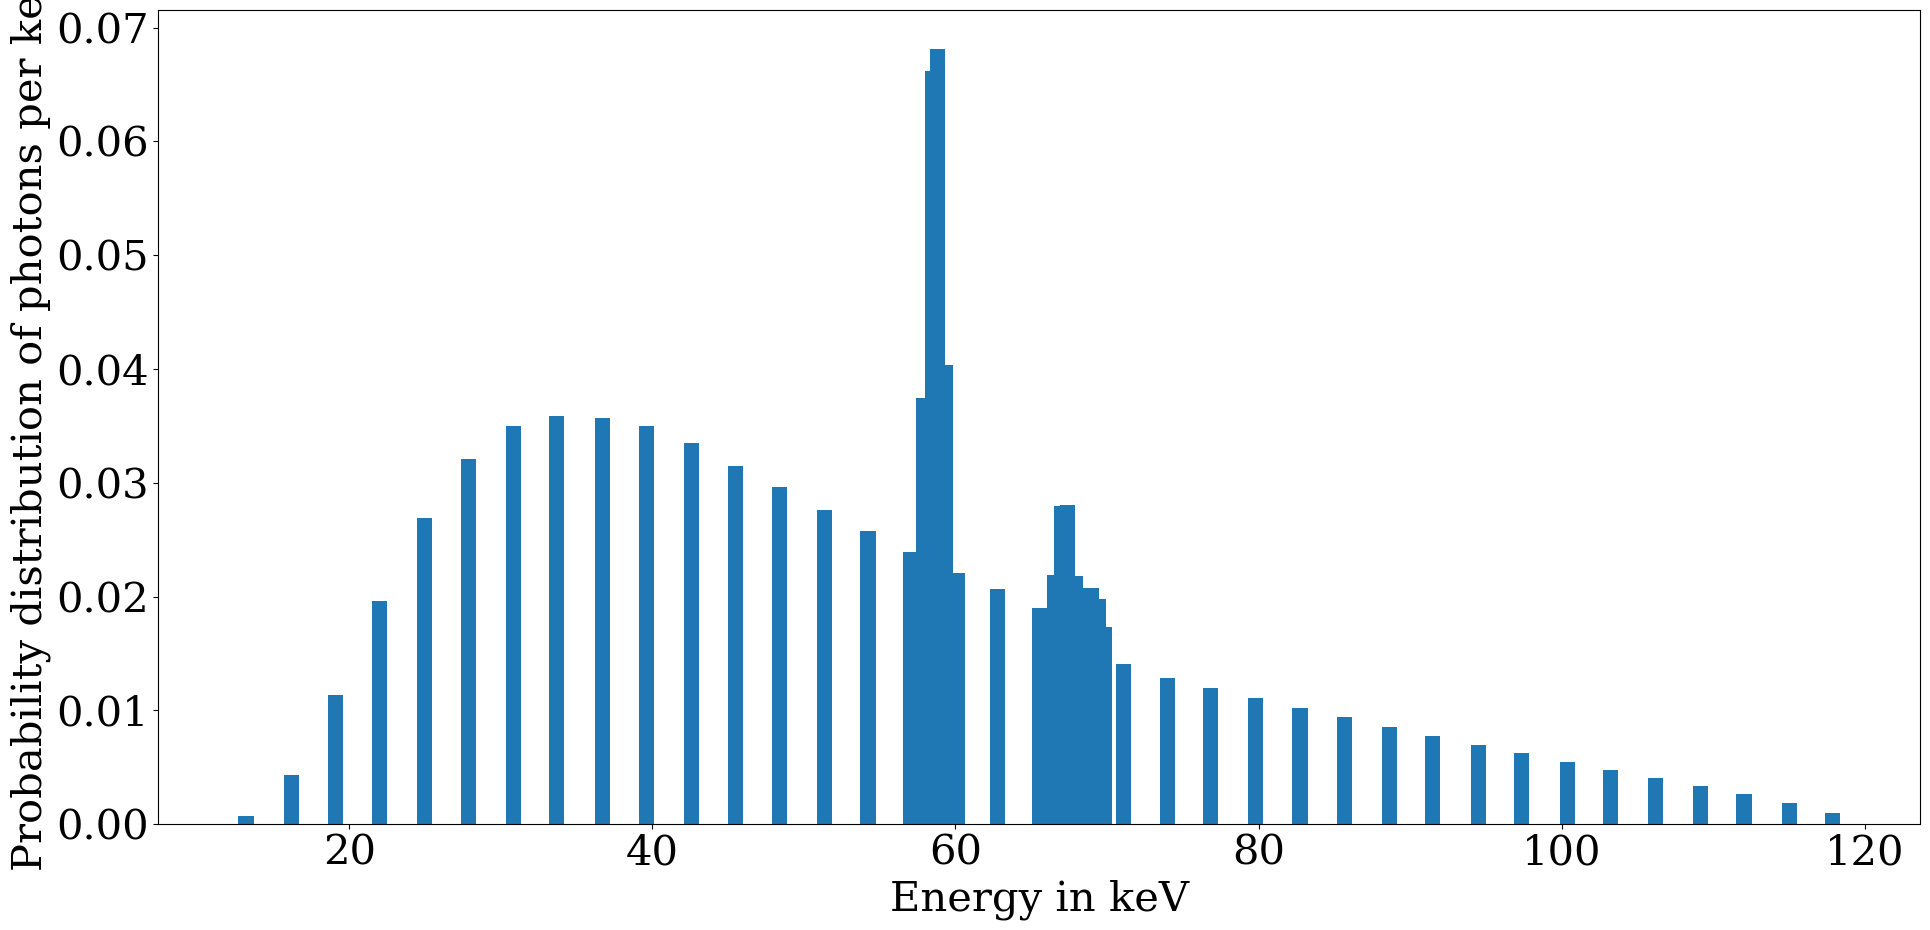

In [10]:
plt.figure(figsize= (20,10))
plt.bar(energy_bins, photon_count, width=1)
plt.xlabel('Energy in keV')
plt.ylabel('Probability distribution of photons per keV')
plt.tight_layout()
plt.savefig(output_path + "/spectrum-" + str(kV) + "kV-no_filtraion.pdf")
plt.savefig(output_path + "/spectrum-" + str(kV) + "kV-no_filtraion.png")
plt.show()

Compute an X-ray image

In [11]:
x_ray_image_no_filtration = np.array(gvxr.computeXRayImage(), dtype=np.single) / gvxr.getTotalEnergyWithDetectorResponse();

Add filtration, here 1 mm of copper

In [12]:
filtration = [["Cu", 1.0, "mm"]]
loadSpectrumXpecgen(kV, filters=filtration, th_in_deg=12, max_number_of_energy_bins=max_number_of_energy_bins);

energy_bins = gvxr.getEnergyBins("keV")
photon_count = np.array(gvxr.getPhotonCountEnergyBins(), dtype=np.single)
photon_count /= photon_count.sum()

Plot the corresponding spectrum

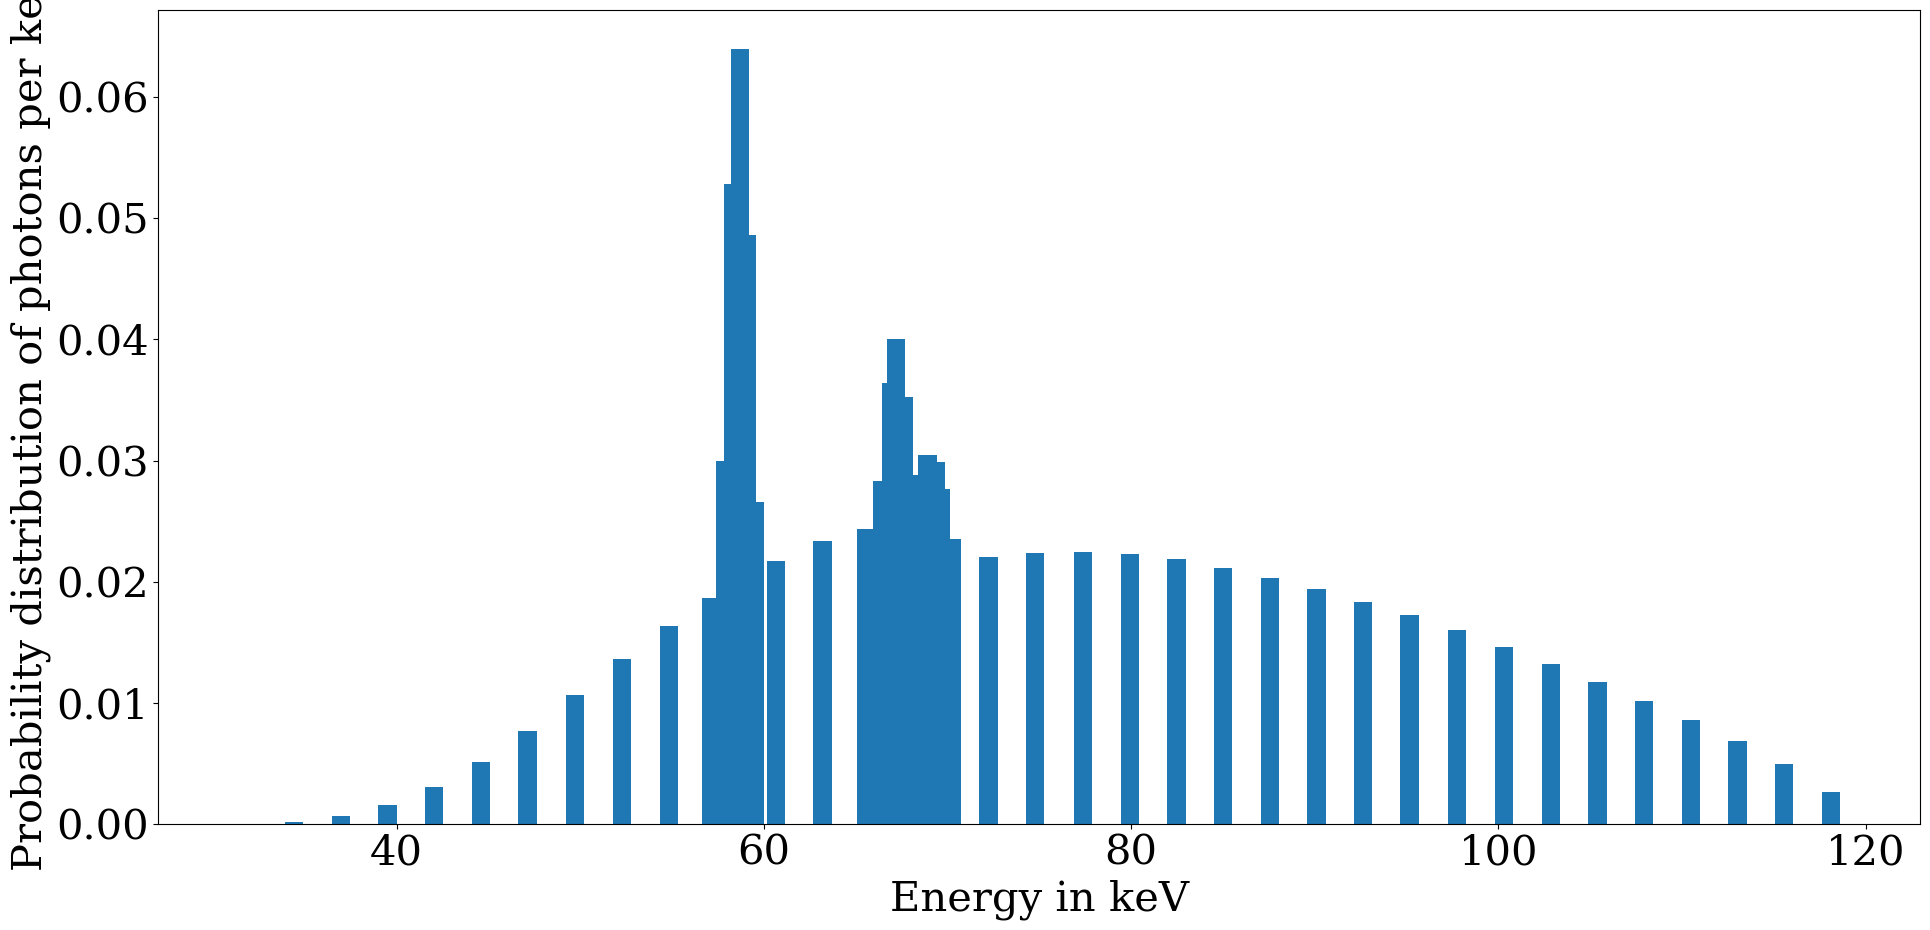

In [13]:
plt.figure(figsize= (20,10))
plt.bar(energy_bins, photon_count, width=1)
plt.xlabel('Energy in keV')
plt.ylabel('Probability distribution of photons per keV')
plt.tight_layout()
plt.savefig(output_path + "/spectrum-" + str(kV) + "kV-" + filtration[0][0] + str(filtration[0][1]) + filtration[0][2] + "_filtraion.pdf")
plt.savefig(output_path + "/spectrum-" + str(kV) + "kV-" + filtration[0][0] + str(filtration[0][1]) + filtration[0][2] + "_filtraion.png")
plt.show()

Compute an X-ray image

In [14]:
x_ray_image_with_filtration = np.array(gvxr.computeXRayImage(), dtype=np.single) / gvxr.getTotalEnergyWithDetectorResponse();

Display the X-ray images and compare them

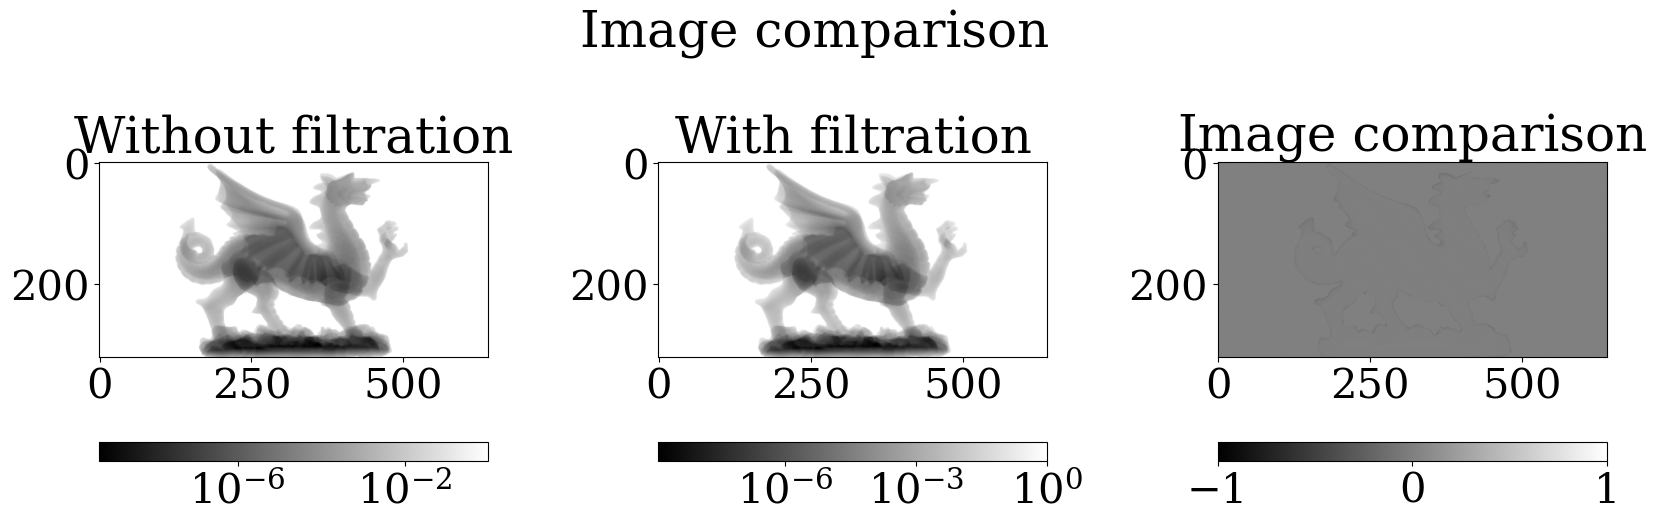

In [15]:
plt.figure(figsize=(17, 7.5))

plt.suptitle("Image comparison", y=0.75)

plt.subplot(131)
plt.imshow(x_ray_image_no_filtration, norm=LogNorm(), cmap="gray")
plt.colorbar(orientation='horizontal')
plt.title("Without filtration")

plt.subplot(132)
plt.imshow(x_ray_image_with_filtration, norm=LogNorm(), cmap="gray")
plt.colorbar(orientation='horizontal')
plt.title("With filtration")

plt.subplot(133)
plt.imshow(x_ray_image_no_filtration - x_ray_image_with_filtration, cmap="gray", vmin=-1, vmax=1)
plt.colorbar(orientation='horizontal');
plt.title("Image comparison")

plt.tight_layout()